<IPython.core.display.Javascript object>


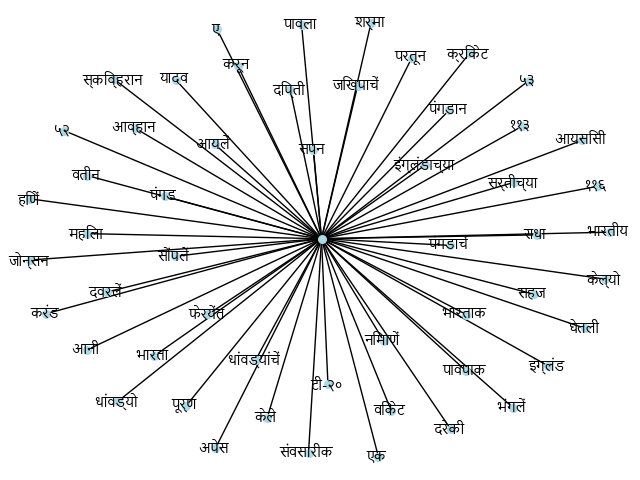

In [18]:
%matplotlib notebook
import codecs
import itertools
import re
import networkx as nx
import matplotlib.pyplot as pl
from matplotlib.font_manager import FontProperties


each_one = []
list_of_sentences = []
subject_list = []
object_list = []
verb_list = []
newDict = {}


with codecs.open('doc1.txt', encoding='utf-8') as f:
    text = f.read()
    sentences = re.split(r' *[\.\?!][\'"\)\]]* *', text)
    #for stuff in sentences:
        #list_of_sentences.append(stuff)

with codecs.open('stopwords.txt', encoding='utf-8') as f:
    stopwords=f.read()
#with codecs.open('final1.txt', encoding='utf-8') as f:
  #  f.write(finaloutput)
first_words=[]
second_words=[]
for line in sentences:
    words = line.split()
    for w in words:
        first_words.append(w)

for line in stopwords:
    w = line.split()
    for i in w:
        second_words.append(i)
for word1 in first_words :
    for word2 in second_words:
        if word1==word2:
            first_words.remove(word2)      

for stuff in first_words:
    list_of_sentences.append(stuff)




f = open('doc1_tag.txt', 'r')
for line in f:
    k,v = line.strip().split('/')
    newDict[k.strip().decode('utf-8')] = v.strip()
f.close()


for sentence in list_of_sentences:
    a = b = c = ""
    sentence_word_list = sentence.split()
    for word in sentence_word_list:
        if newDict[word] == 'N-NNP':
            a += word + " "
        if newDict[word] == 'N-NN' or 'JJ' or 'QT-QTC' or 'RB' or 'N-NST' or 'PR-PRP' or 'PSP' or 'CC-CCD':
            b += word + " "
        if newDict[word] == 'V-VM-VF':
            c += word + " "

    subject_list.append(a)
    object_list.append(b)
    verb_list.append(c)
    

graph = nx.Graph()
labels = {}
for subject in subject_list:
    s = subject
    graph.add_node(s)
    labels[s] = s

    
for obj in object_list:
    b = obj
    graph.add_node(b)
    labels[b] = b
    
for verb in verb_list:
    v = verb
    graph.add_node(v)
    labels[v] = v

    
labels = {}

prop = FontProperties()
graph = nx.Graph()


for (s, o, v) in zip(subject_list, object_list, verb_list):
    graph.add_edge(s, o)
    graph.add_edge(o, v)

pos=nx.spring_layout(graph)
nx.draw(graph, with_labels = True, font_family = "Nirmala UI", node_size = 30, font_size = 10, node_color = "lightblue")

pl.show()